### Imports

In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
import random

### File Directory

In [2]:
data_file_name = "Lohmans SupplementaryData Ligation observation tables.xlsx"

In [3]:
def get_data_matrix(data_file_name): 
    dir_path = os.path.dirname(os.path.realpath("Data Workflow"))
    # pandas dataframe [this is the matrix right from xlsx file]
    df = pd.read_excel(dir_path + "/" + data_file_name)
    # this is changing the index to TTT or AAA as we would like
    df.set_index(df.columns[0], inplace = True)
    return df

In [4]:
# getting data from the file to a matrix
matrix = get_data_matrix(data_file_name)

In [5]:
print(matrix)

           AAA   AAC   AAG   AAT   ACA  ACC  ACG  ACT  AGA  AGC  ...  TCG  \
Overhang                                                         ...        
TTT       5294     0    16     7     0    0    0    0   13    0  ...    0   
GTT          2  4748     2   588     0   91    0    1    0   37  ...    0   
CTT          2     1  4826     2     0    0   39    0    0    0  ...    0   
ATT          5    20     9  6179     0    1    0    5    0    0  ...    0   
TGT          4     0     0     0  5420    3   74   21    1    0  ...    0   
...        ...   ...   ...   ...   ...  ...  ...  ...  ...  ...  ...  ...   
ACA          0     0     0     0     0    0    0    0    0    0  ...    0   
TAA          0     0     0     0     0    0    0    0    0    0  ...    0   
GAA          0     0     0     0     0    2    0    0    0    6  ...    1   
CAA          0     0     2     0     0    0    1    0    0    0  ...    1   
AAA          0     0     0     0     0    0    0    0    0    0  ...    0   

### Perform SVD

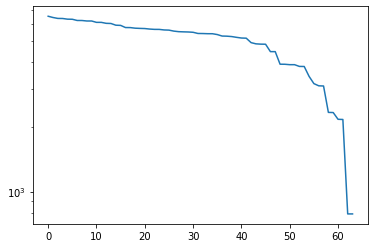

In [6]:
col_seq = matrix.columns
row_seq = matrix.index
matrix_np = matrix.to_numpy()
U, s, VT = np.linalg.svd(matrix_np)

plt.semilogy(s)

Let us print out the most important features

In [7]:
def plot_svd_char(importance_index):
    s = len(importance_index)
    fig, ax = plt.subplots(s,1,figsize = (10,6))
    plt.xticks(rotation=90)
    
    # picking up random colors here
    c = ["#" + ''.join([random.choice('0123456789ABCDEF') for j in range(6)]) for i in range(s)]
    
    for num in importance_index:
        ax[num].bar(row_seq,U[:,num], label = 'Sequence Priority: ' + str(num), alpha = 0.6, color = c[num])
        ax[num].set_ylim(-0.6,0.6)
        ax[num].set_xticks([])
        
    ax[-1].set_xticks(range(len(row_seq)))
    ax[-1].set_xticklabels(row_seq)
    
    fig.legend()

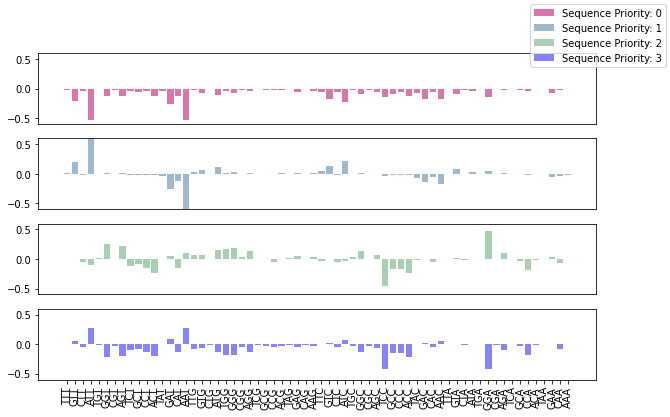

In [8]:
# three most import decompositions
plot_svd_char([0,1,2,3])

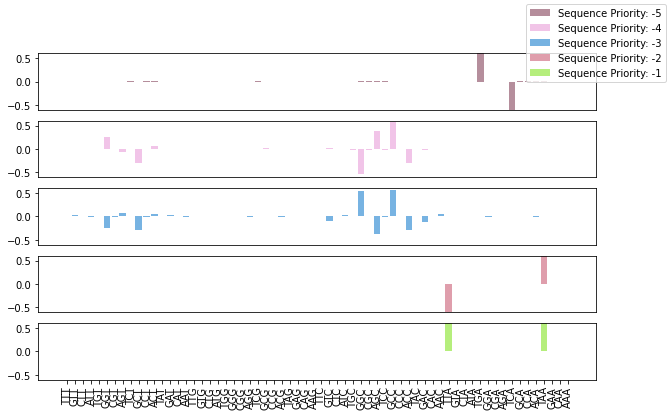

In [9]:
# 5 least important parts
plot_svd_char([-1,-2,-3,-4,-5])

What I think I have constructed here is an interaction basis. If I take AAA and I want its interaction profile, I would in theory use a reduced representation of it. How good is this interaction basis? 

Could this be somehow used to derive the hurestics we talked about before? Maybe the point system can be assigned based on something in the reduced data set? 